In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,8)
import math
import random

In [2]:
data = [0.5, 0.7, 0.8, 1.9, 2.4, 6.1, 6.2, 7.3]

In [3]:
def histogram_estimator(x, data, h, origin):
    lower = ((x-origin)//h)*h + origin
    higher = lower+h
    n = sum(1 for d in data if lower < d <= higher)
    N = len(data)
    return n/(N*h)

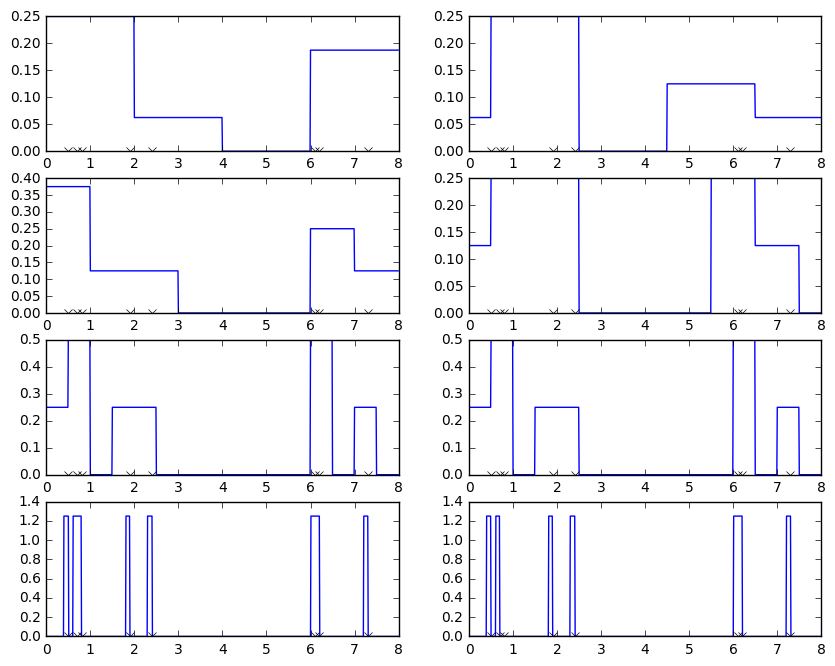

In [4]:
hs = [2, 1, 0.5, 0.1]
origins = [0, 0.5]
xs = np.arange(0, 8, 0.01)
for i, h in enumerate(hs):
    for j, origin in enumerate(origins):
        r = len(hs)
        c = len(origins)
        plt.subplot(r, c, (c*i)+j+1)
        plt.plot(xs, [histogram_estimator(x, data, h, origin) for x in xs])
        plt.plot(data, [0]*len(data), 'xk')
    


In [5]:
def naive_estimator(x, data, h):
    n = sum(1 for d in data if x-h/2 < d <= x+h/2)
    N = len(data)
    return n/(N*h)

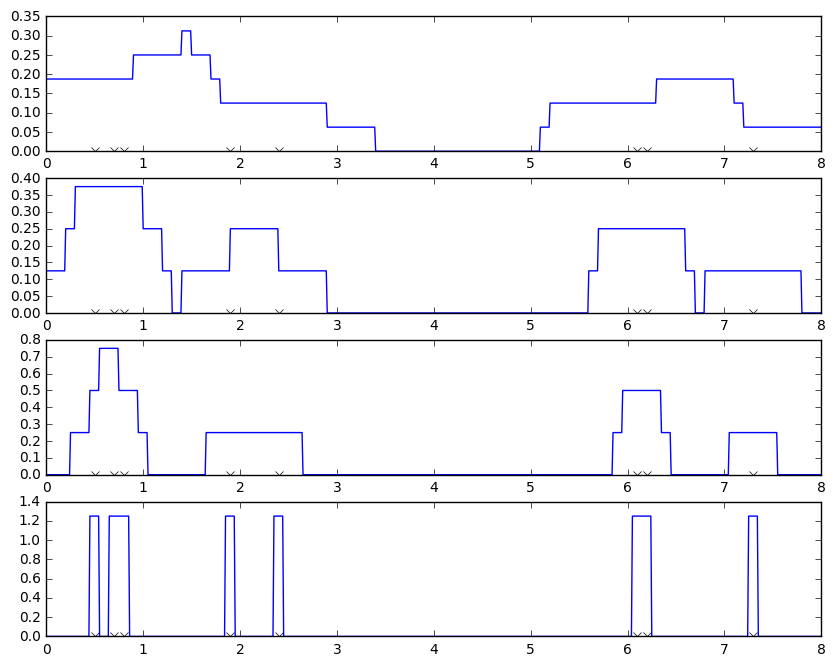

In [6]:
hs = [2, 1, 0.5, 0.1]
xs = np.arange(0, 8, 0.01)
for i, h in enumerate(hs):
    r = len(hs)
    plt.subplot(r, 1, i+1)
    plt.plot(xs, [naive_estimator(x, data, h) for x in xs])
    plt.plot(data, [0]*len(data), 'xk')

In [7]:
def gaussian_kernel(u):
    return 1.0/math.sqrt(2*math.pi)*math.exp(-(u*u)/2)

In [8]:
def kernel_estimator(x, data, h, kernel):
    N = len(data)
    return 1/(N*h) * sum(kernel((x-d)/h) for d in data)

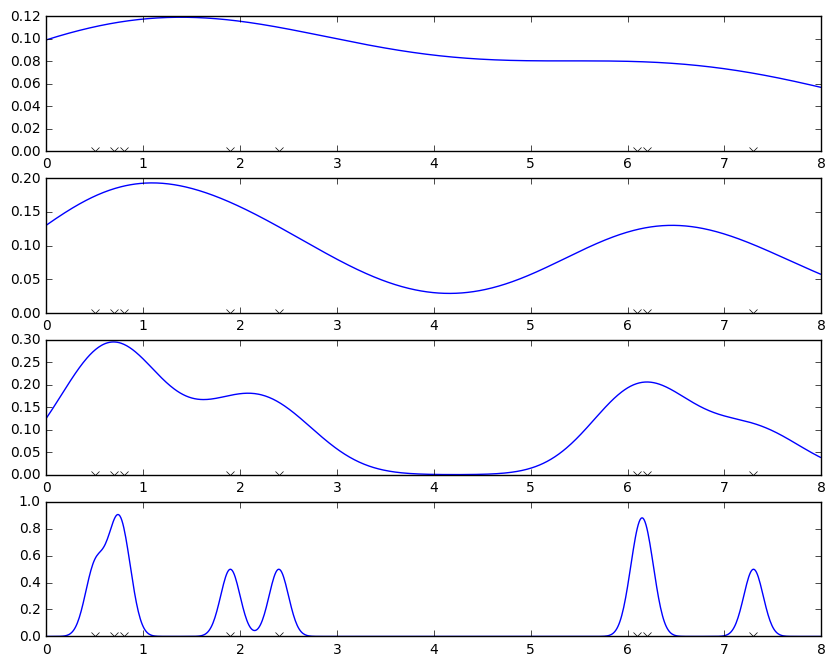

In [9]:
hs = [2, 1, 0.5, 0.1]
xs = np.arange(0, 8, 0.01)
for i, h in enumerate(hs):
    r = len(hs)
    plt.subplot(r, 1, i+1)
    plt.plot(xs, [kernel_estimator(x, data, h, gaussian_kernel) for x in xs])
    plt.plot(data, [0]*len(data), 'xk')

In [10]:
def k_nearest_estimator(x, data, k):
    dists = [abs(x - d) for d in data]
    sorted_dists = sorted(dists)
    dist_k = sorted_dists[k]
    N = len(data)
    return k/(2*N*dist_k)

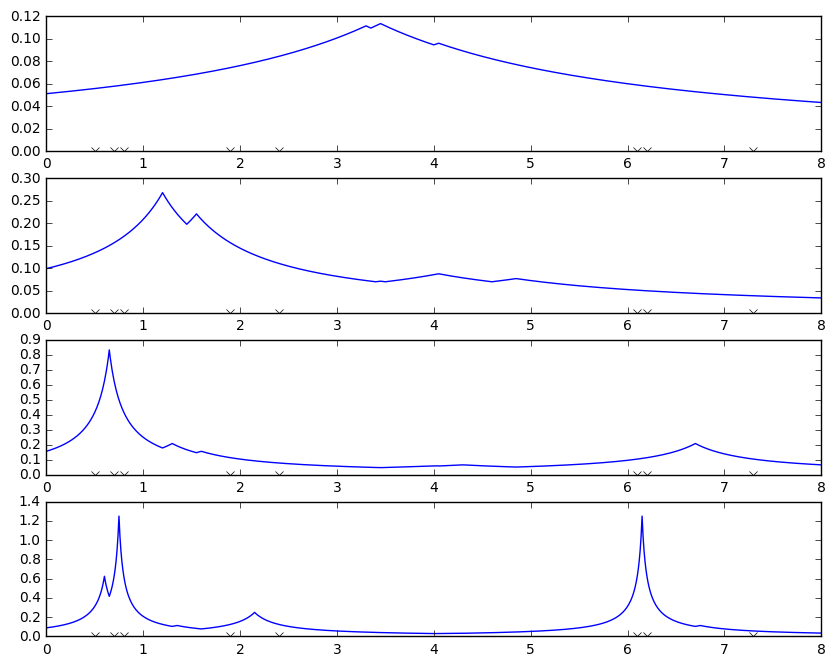

In [11]:
ks = [5, 3, 2, 1]
xs = np.arange(0, 8, 0.01)
for i, k in enumerate(ks):
    r = len(ks)
    plt.subplot(r, 1, i+1)
    plt.plot(xs, [k_nearest_estimator(x, data, k) for x in xs])
    plt.plot(data, [0]*len(data), 'xk')

In [12]:
def k_nn_smoothed_kernel_estimator(x, data, k, kernel):
    dists = [abs(x - d) for d in data]
    sorted_dists = sorted(dists)
    dist_k = sorted_dists[k]
    N = len(data)
    return 1/(N*dist_k) * sum(kernel((x - d)/dist_k) for d in data)

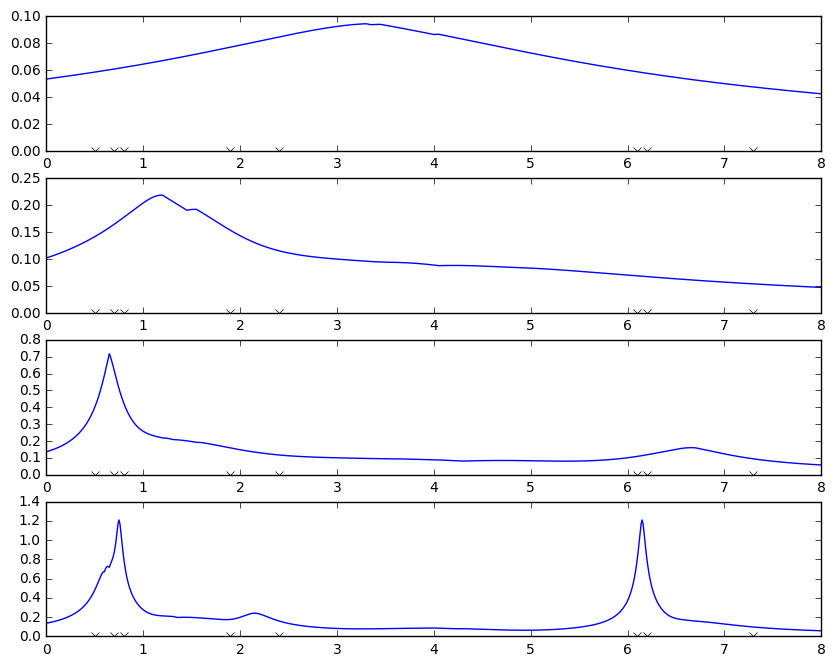

In [13]:
ks = [5, 3, 2, 1]
xs = np.arange(0, 8, 0.01)
for i, k in enumerate(ks):
    r = len(ks)
    plt.subplot(r, 1, i+1)
    plt.plot(xs, [k_nn_smoothed_kernel_estimator(x, data, k, gaussian_kernel) for x in xs])
    plt.plot(data, [0]*len(data), 'xk')

In [14]:
random.seed(42)
data2D = [(random.uniform(0, 10), random.uniform(0, 10)) for _ in range(20)]

In [15]:
def multivariate_gaussian_kernel(d, u):
    return ((1/(math.sqrt(2*math.pi)))**d)*math.exp(-sum(t**2 for t in u)/2)

In [16]:
def multivariate_kernel_estimator(x_tup, data, d, h, multi_kernel):
    N = len(data)
    return 1.0/(N * h**d) * sum(multi_kernel(d, ((x - dat)/h for x, dat in zip(x_tup, dat_tup))) for dat_tup in data)

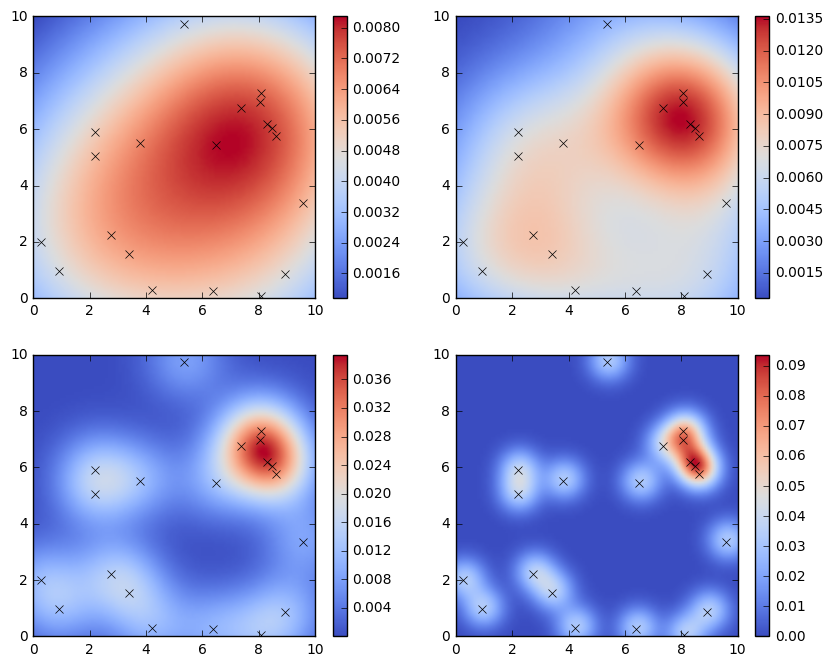

In [17]:
hs = [3, 2, 1, 0.5]
xs = np.arange(0, 10, 0.1)
ys = np.arange(0, 10, 0.1)
for i,h in enumerate(hs):
    plt.subplot(2,2,i+1)
    responses = [[multivariate_kernel_estimator((x, y), data2D, 2, h, multivariate_gaussian_kernel) for x in xs] for y in ys]
    plt.imshow(responses, extent=(0,10,0,10), cmap=plt.cm.coolwarm, origin='lower')
    plt.plot(*zip(*data2D), 'xk')
    plt.colorbar()